<a href="https://colab.research.google.com/github/IA2122/entregable-1-paochoa/blob/main/Proyecto1_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de empezar cargaré todas las librerias que iré a usar para que sea más limpio el resto del código

In [42]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

Cargamos los datos de entrenamiento, usando la función `read_csv` y almacenando el resultado en un DataFrame llamado `df_train`. A continuación mostramos las 10 primeras instancias del dataset usando el método `head` de la DataFrame para ver como son dichos datos:

Se intenta predecir la actividad que estaba realizando un paciente a partir de distinta información como el nivel de azúcar o el pulso.

0- De pie 1- Caminando 2- Sentado 3- Cayendo 4- Con calambres 5- Corriendo

Las columnas indican:

*   SL: nivel de azucar

*   EEG: ratio monitor EEG

*   BP: presión en sangre

*   HR: ratio de latidos

*   CIRCULATION: circulación de sangre

In [43]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
0,4019.64,-1600.00,13,79,317,3
1,2191.03,-1146.08,20,54,165,2
2,2787.99,-1263.38,46,67,224,2
3,9545.98,-2848.93,26,138,554,4
4,14148.80,-2381.15,85,120,809,4
5,7336.79,-1699.80,22,95,427,5
6,24949.90,-3198.06,35,157,1519,3
7,39245.50,-2590.00,15,196,1885,3
8,59742.00,-5101.00,56,249,2826,0
9,140950.00,-1410.00,82,315,5844,4


In [44]:
df_train.shape

(11999, 6)

Como se puede observar a partir de la salida anterior, tenemos un dataset que podría considerarse de tamaño medio ya que tiene 12000 filas.

------------------------------------------------------------------------------

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL           11999 non-null  float64
 1   EEG          11999 non-null  float64
 2   BP           11999 non-null  int64  
 3   HR           11999 non-null  int64  
 4   CIRCULATION  11999 non-null  int64  
 5   ACTIVITY     11999 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 562.6 KB


Podemos observar que todos los valores son enteros por lo que no habrá problemas de casteo. También se puede observar que no hay ninguna columna que tenga valores nulos.

-------------------------------------------------------------------------------

In [46]:
df_train.describe()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
count,1.199900e+04,1.199900e+04,11999.000000,11999.000000,11999.000000,11999.000000
mean,7.566022e+04,-2.229112e+04,58.483874,212.415535,2900.695058,2.368947
std,1.266692e+05,1.284765e+05,48.146245,130.375027,3789.822123,1.736608
min,4.222420e+01,-3.396800e+06,0.000000,33.000000,5.000000,0.000000
25%,1.006220e+04,-5.889500e+03,25.000000,120.000000,587.000000,0.000000
50%,3.243530e+04,-3.498580e+03,45.000000,180.000000,1626.000000,3.000000
75%,8.156320e+04,-2.290000e+03,79.000000,271.000000,3539.000000,4.000000
max,2.352450e+06,1.410000e+06,533.000000,981.000000,41819.000000,5.000000


Para ver como están distribuidos los valores de la variable que querremos predecir usaré el método `value_counts` sobre dicha variable

In [47]:
df_train['ACTIVITY'].value_counts()

0    3344
3    2625
4    2569
2    1849
5    1241
1     371
Name: ACTIVITY, dtype: int64

Como estos datos no son muy representativos a primera vista, calcularé los porcentajes pasandole a la anterior función: `normalize=True`

In [48]:
df_train['ACTIVITY'].value_counts(normalize=True)

0    0.278690
3    0.218768
4    0.214101
2    0.154096
5    0.103425
1    0.030919
Name: ACTIVITY, dtype: float64

--------------------------------------------------------------------------------
¿Qué actividad hace el usuario con mayor azucar en sangre?

In [49]:
max_SL = df_train["SL"].max()
df_train[df_train["SL"] == max_SL]["ACTIVITY"]

6793    0
Name: ACTIVITY, dtype: int64

*RESPUESTA*

Está de pie

------------------------------------------------------------------------

¿Y el que mayor pulsaciones tiene?

In [50]:
max_HR = df_train["HR"].max()
df_train[df_train["HR"] == max_HR]["ACTIVITY"]

8674    0
Name: ACTIVITY, dtype: int64

*RESPUESTA*

El que más HR tiene también está de pie


--------------------------------------------------------------------------------

La actividad más común es 0 (de pie), pero, ¿como son estos usuarios?

In [51]:
df_train[df_train['ACTIVITY'] == 0].mean()

SL             115259.184758
EEG            -10439.162174
BP                 72.426136
HR                259.142644
CIRCULATION      4035.958433
ACTIVITY            0.000000
dtype: float64

*RESPUESTA*

Se puede ver que los usuarios no están muy sanos ya que tienen bastante azúcar en sangre y una presión sanguínea y pulso cardíaco mucho mayores a la media

------------------------------------------------------------------------------

La segunda actividad más común es 1 (Caminando), ¿cómo son estos usuarios?

In [52]:
df_train[df_train['ACTIVITY'] == 1].mean()

SL             18772.605988
EEG            -4347.166846
BP                39.536388
HR               117.024259
CIRCULATION      927.053908
ACTIVITY           1.000000
dtype: float64

*RESPUESTA*

Estos usuarios tampoco son muy sanos pero están un poco mejor que el caso anteriormente mencionado.

--------------------------------------------------------------------------------

¿Es verdad que correr ayuda más a la circulación que andar?

In [53]:
df_train.loc[(df_train['ACTIVITY'] == 1)]['HR'].mean() < df_train.loc[(df_train['ACTIVITY'] == 5)]['HR'].count()

True

*RESPUESTA*

En promedio, la gente que corre tiene una mejor circulación de la sangre que los que andan

-------------------------------------------------------------------------------


A continuación mostraé los datos ordenados respecto a las variables que más nos interesan: SL y CIRCULATION

In [54]:
df_train.sort_values(by=['SL', 'CIRCULATION'],
        ascending=[True, True]).head(10)

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
2334,42.2242,-195.0,96,33,5,3
10432,43.5905,-637.0,94,33,5,4
7125,45.7832,-533.0,6,33,5,2
5257,46.0085,-262.0,6,33,5,1
11206,46.1404,-492.0,6,33,5,2
10126,46.5214,-368.0,96,33,5,4
8802,47.4192,-460.0,8,33,5,1
446,47.7134,-336.0,6,33,5,1
8211,47.8229,-518.0,6,33,5,1
3971,47.9959,-283.0,96,33,5,3


Los descriptores estadísticos y todo lo obtenido previamente nos pueden ayudar a entender como son, de una forma más general, los datos. Pero si queremos conocer si siguen una distribución normal, la correlación entre las distintas variables, la detección de posibles valores espurios, .... habría que realizar una serie de diagramas y sus correspondientes análisis.



------------------------------------------------------

Para empezar este análisis exploratorio, dibujaré los gráfico de distribución para cada variable y compobaré su normalidad

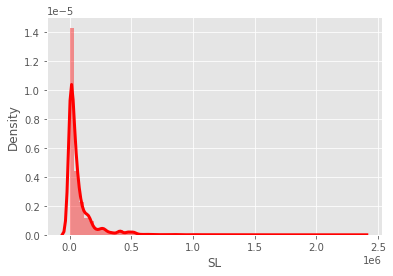

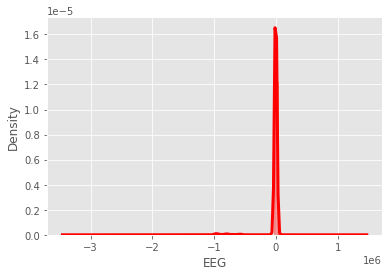

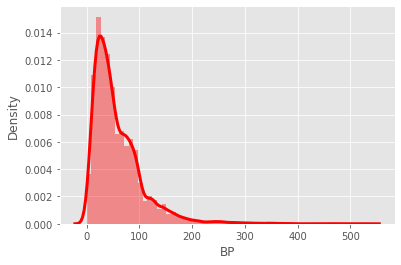

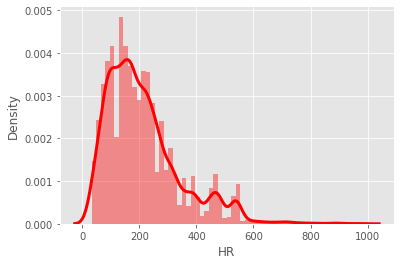

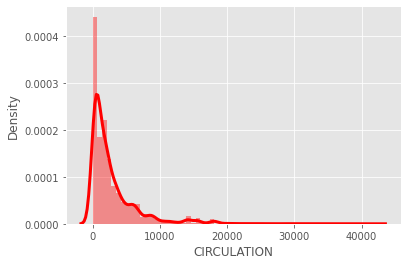

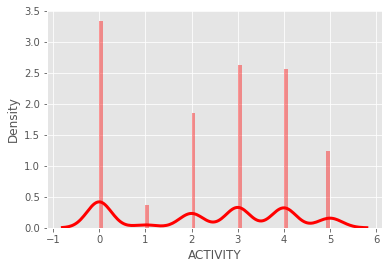

In [55]:
for colname in df_train.columns[:]:
  sns.distplot(df_train[colname], hist = True, kde = True, bins = 60, color = "red", kde_kws = {'linewidth': 3})
  plt.show()

Tras observar el anterior gráfico, he llegado a la conclusión de que ninguna de las variables sigue una distribución normal. Esto se debe a que su pico de densidad no se encuentra en el punto medio, haciendo que el diagrama fuese simétrico, sino que está, en la mayoría de casos, desplazado a la izquierda.

También se puede observar que no hay ningún dato demasiado alejado del resto por lo que la existencia de valores espurios queda descartada.

--------------------------------------------------------------------------------

Lo siguiente que estudiaré será la correlación que tienen las distintas variables, ya que en caso de que algunas esten muy correladas entre sí eso podría causar que los modelos no fuesen tan buenos.

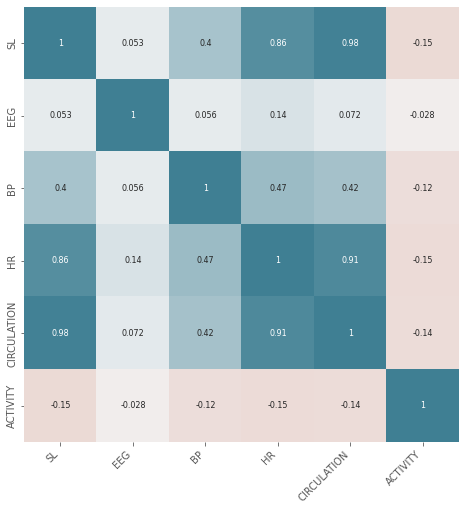

In [56]:
# Heatmap matriz de correlaciones
# ==============================================================================
corr_matrix = df_train.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Como se puede observar en la anterior matriz, las variables `Cirulation` y `SL` están altamente correladas, más concretamente un 98%.
Además `Circulation` está también bastante correlada con `HR`.
Esto no es del todo significativo ya que, entendiendo un poco el trasfondo de los datos, tanto el azúcar en sangre como las pulsaciones son en sí conceptos que dependen el uno del otro, por lo que no sería un problema por el que preocuparse.